# GSASII Background refinement

In [2]:
%matplotlib inline
import G2script as G2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
PROJECT_NAME = 'gsas_background.gpx'
gpx = G2.G2Project(newgpx=PROJECT_NAME)
gpx.save()

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx


#### Add powder diffraction data (magnetite) to create a new histogram

In [4]:
hist = gpx.add_powder_histogram(
    datafile='magnetit.prn', 
    iparams='cuka.instprm',
)

/home/edgar1993a/work/pyobjcryst/magnetit.prn
Skipping header line     5.000       166

Skipping header line     5.020       176

Skipping header line     5.040       166

GSAS powder data scan error: no BANK records
/home/edgar1993a/work/pyobjcryst/magnetit.prn read by Reader Topas xye or 2th Fit2D chi
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank None


1:3: Trying to find one of END, data_heading
>     5.000       166
>     ^
1:3: Trying to find one of END, data_heading
>     5.000       166
>     ^


#### Plot the histogram with the PXRD data and the background signal

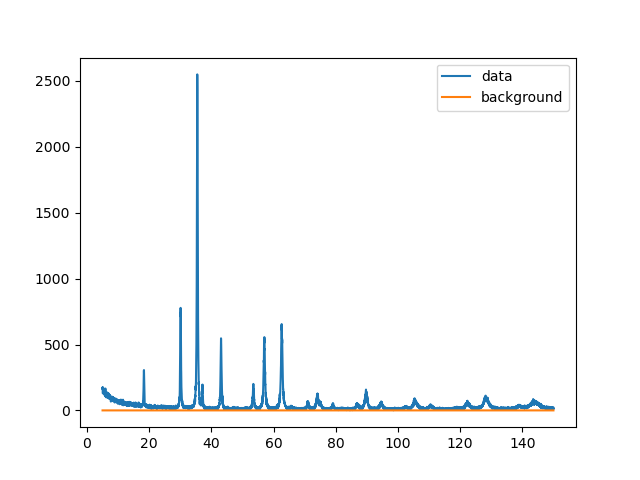

In [5]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"),hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"),hist.getdata("background"), label="background")
ax.legend()
pass

## Each refinement parameter is set in a dictionary
### The refinement of the background is associated to the histogram

#### First, we create a dictionary with the type of background, number of coefficients, and the key refine to True

In [6]:
background_refinement = {
    "type" : "chebyschev-1",
    "no. coeffs" : 9,
    "refine" : True,
}

#### hist.set_refinement accepts only dictionaries,
the keys of the dictionaries have to be "Limits", "Instrument Parameters" or "Background" check: https://confluence.esrf.fr/x/f1npBg

In [7]:
hist.set_refinements(
    refs={
        "Background" : background_refinement,
    }
)

#### By default, do_refinements perform refines across all histogram and phases, but we have not phases yet, only one histogram

In [9]:
# gpx.do_refinements(phase=[])

#### We create a phase associated to the magnetite histogram (and a .cif file for the magnetite cell)

In [11]:
ph_magnetite = gpx.add_phase(
    phasename='magnetite',
    phasefile="Fe3O4_3.cif",
    histograms=[hist],
)

/home/edgar1993a/work/pyobjcryst/Fe3O4_3.cif read by Reader CIF
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx


#### We can refine the background now

In [12]:
gpx.do_refinements()

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx
 Hessian Levenberg-Marquardt SVD refinement on 10 variables:
initial chi^2 3.4896e+05 with 7251 obs.
Cycle 0: 0.14s, Chi**2: 1.5145e+05 for 7251 obs., Lambda: 0,  Delta: 0.566, SVD=0
Cycle 1: 0.12s, Chi**2: 1.5145e+05 for 7251 obs., Lambda: 0,  Delta: 5.51e-11, SVD=0
converged
Maximum shift/esd = 64.086 for all cycles
Read from file:/home/edgar1993a/work/pyobjcryst/gsas_background.bak0.gpx
Save to file  :/home/edgar1993a/work/pyobjcryst/gsas_background.gpx
GPX file save successful
 Refinement results are in file: /home/edgar1993a/work/pyobjcryst/gsas_background.lst
 ***** Refinement successful *****


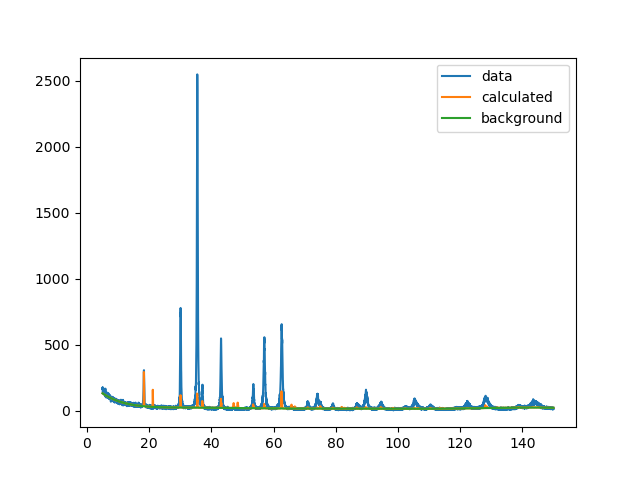

In [13]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"), hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"), hist.getdata("ycalc"), label="calculated")
ax.plot(hist.getdata("X"), hist.getdata("background"), label="background")
ax.legend()

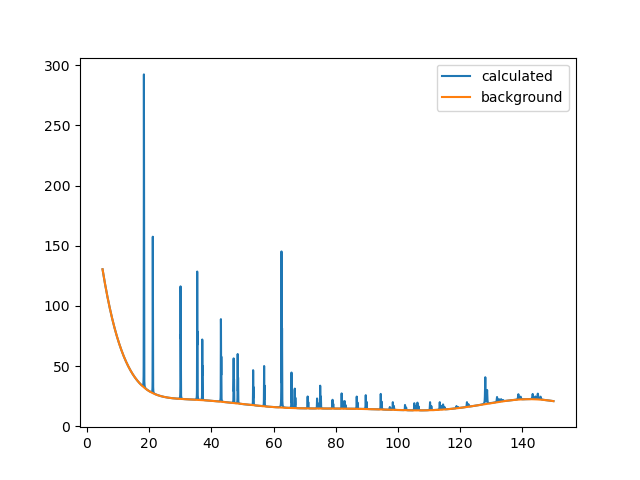

In [14]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"), hist.getdata("ycalc"), label="calculated")
ax.plot(hist.getdata("X"), hist.getdata("background"), label="background")
ax.legend()
pass

#### We can visualize the 'clean' histogram by taking the residual data

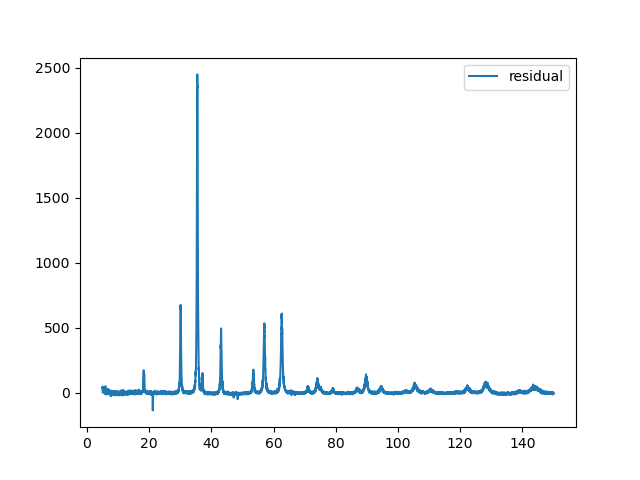

In [33]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"), hist.getdata("residual"), label="residual")
ax.legend()
pass

#### And save all the data set

In [34]:
hist.Export(fileroot="magnetite_gsas", extension=".txt")

'/home/edgar1993a/work/pyobjcryst/magnetite_gsas.txt'

# 

# Automatic Background
## GSAS-II offers an automatic searching of fixed points to subtract the background

#### Reset the project and the histogram, now we dont need to include the phase, since we are not using do_refinements

In [54]:
PROJECT_NAME = 'gsas_background.gpx'
gpx = G2.G2Project(newgpx=PROJECT_NAME)
gpx.save()
hist = gpx.add_powder_histogram(datafile='magnetit.prn', iparams='cuka.instprm')

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx
/home/edgar1993a/work/pyobjcryst/magnetit.prn
Skipping header line     5.000       166

Skipping header line     5.020       176

Skipping header line     5.040       166

GSAS powder data scan error: no BANK records
/home/edgar1993a/work/pyobjcryst/magnetit.prn read by Reader Topas xye or 2th Fit2D chi
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank None


1:3: Trying to find one of END, data_heading
>     5.000       166
>     ^
1:3: Trying to find one of END, data_heading
>     5.000       166
>     ^


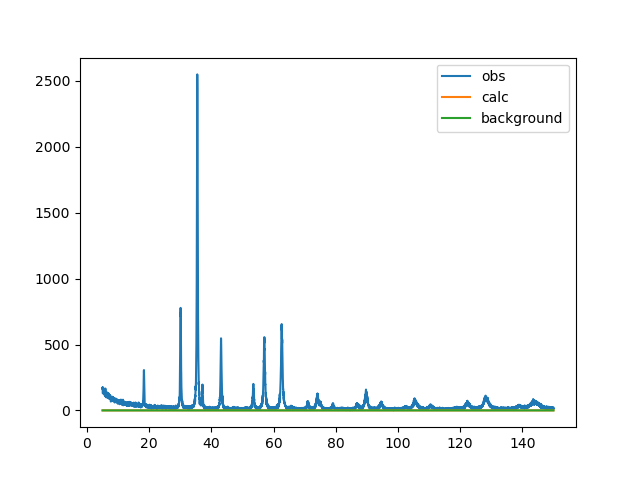

In [55]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"), hist.getdata("yobs"), label="obs")
ax.plot(hist.getdata("X"), hist.getdata("ycalc"), label="calc")
ax.plot(hist.getdata("X"), hist.getdata("background"), label="background")
ax.legend()
pass

#### calc_autobkg generates a series of point to fit later to a Whittaker baseline

In [56]:
hist.calc_autobkg()

Using default value of 6.55 for pybaselines.whittaker.[i]arpls background computation


array([134.47838403, 134.13951842, 133.80065281, ...,  13.14033642,
        13.08842003,  13.03650335])

#### Then, we set the dictionary of background refinement as before and fit the points, without using gpx.do_refinements

In [57]:
hist.set_refinements({"Limits" : {"low"  : 15}, "Background" : {"no. coeffs" : 6, "refine" : True}})
hist.fit_fixed_points()

Number of function calls: 3 Number of observations: 6751 Number of parameters: 6
fitpeak time =    0.017s,    0.017s/cycle
Rwp =   21.52%, chi**2 =       126091, reduced chi**2 =  18.69
Background coefficients for chebyschev-1 function
value:     21.99382    -2.40084     8.80449    -1.74824     1.50723    -1.74735
esd  :      0.06421     0.11262     0.10103     0.09914     0.08629     0.08584
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx


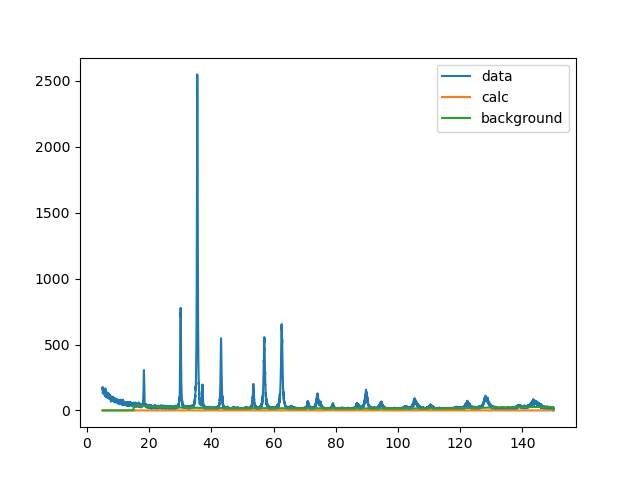

In [58]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"),hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"),hist.getdata("ycalc"), label="calc")
ax.plot(hist.getdata("X"),hist.getdata("background"), label="background")
ax.legend()

#### We can iterate again with a higher polynom

In [59]:
hist.set_refinements({"Background" : {"no. coeffs" : 8, "refine" : True}})
hist.fit_fixed_points()

Number of function calls: 3 Number of observations: 6751 Number of parameters: 8
fitpeak time =    0.019s,    0.019s/cycle
Rwp =   21.16%, chi**2 =       121911, reduced chi**2 =  18.08
Background coefficients for chebyschev-1 function
value:     21.91802    -2.89748     8.64522    -2.28526     1.31576    -2.40526
esd  :      0.06570     0.11585     0.10639     0.10419     0.09640     0.09567
value:     -0.35206    -1.22620
esd  :      0.08411     0.08389
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx


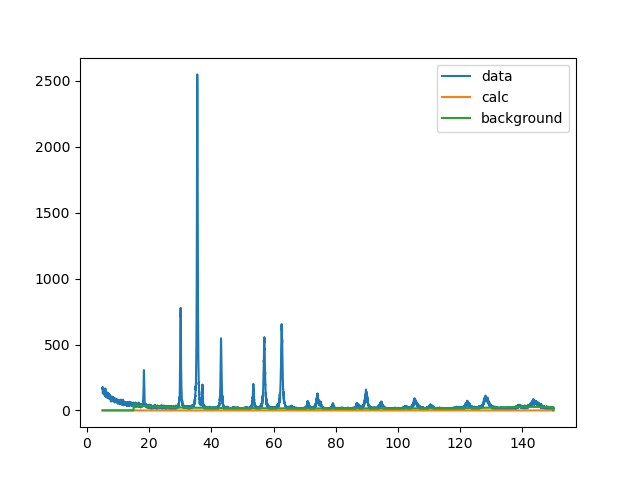

In [60]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"),hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"),hist.getdata("ycalc"), label="calc")
ax.plot(hist.getdata("X"),hist.getdata("background"), label="background")
ax.legend()

#### The background is well-fitted, now we will include the phase

In [61]:
ph_magnetite = gpx.add_phase(
    phasename='magnetite',
    phasefile="Fe3O4_3.cif",
    histograms=[hist],
)

/home/edgar1993a/work/pyobjcryst/Fe3O4_3.cif read by Reader CIF
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx


In [62]:
gpx.do_refinements()

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx
 Hessian Levenberg-Marquardt SVD refinement on 9 variables:
initial chi^2 2.3353e+05 with 6751 obs.
Cycle 0: 0.13s, Chi**2: 1.5051e+05 for 6751 obs., Lambda: 0,  Delta: 0.355, SVD=0
Cycle 1: 0.12s, Chi**2: 1.5051e+05 for 6751 obs., Lambda: 0,  Delta: 1.54e-09, SVD=0
converged
Maximum shift/esd = 1.642 for all cycles
Read from file:/home/edgar1993a/work/pyobjcryst/gsas_background.bak0.gpx
Save to file  :/home/edgar1993a/work/pyobjcryst/gsas_background.gpx
GPX file save successful
 Refinement results are in file: /home/edgar1993a/work/pyobjcryst/gsas_background.lst
 ***** Refinement successful *****


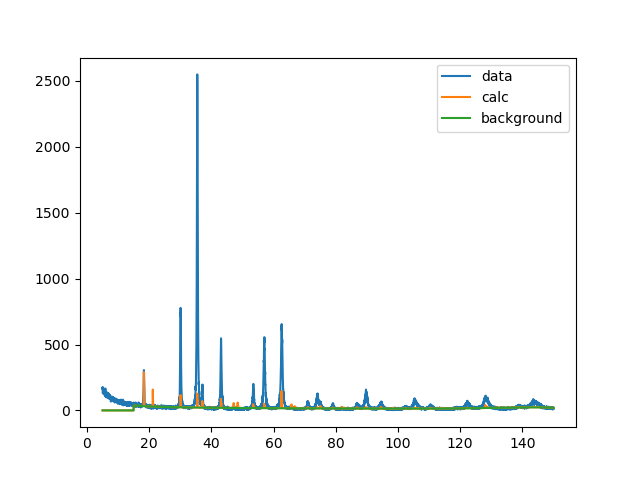

In [63]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"),hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"),hist.getdata("ycalc"), label="calc")
ax.plot(hist.getdata("X"),hist.getdata("background"), label="background")
ax.legend()

#### After including the peaks, we will refine some parameters

In [64]:
instr_params = ["U", "V", "W", "X", "Y", "Z"]
phase_params = {"Cell" : True, "LeBail" : True}
hap_params ={"Scale" : True, "Size" : {"refine" : True}}

In [65]:
hist.set_refinements({"Instrument Parameters" : instr_params})
ph_magnetite.set_refinements(phase_params)
ph_magnetite.set_HAP_refinements(hap_params)

In [66]:
gpx.do_refinements()

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx
 Hessian Levenberg-Marquardt SVD refinement on 18 variables:
initial chi^2 1.5051e+05 with 6751 obs.
divergence: chi^2 1.1487e+06 on 6751 obs. (2 SVD zeros)
	increasing Marquardt lambda to 1.0e-03
divergence: chi^2 1.1425e+06 on 6751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e-02
divergence: chi^2 9.7957e+05 on 6751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e-01
divergence: chi^2 4.5364e+05 on 6751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e+00
divergence: chi^2 2.1939e+05 on 6751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e+01
Cycle 0: 0.35s, Chi**2: 1.3028e+05 for 6751 obs., Lambda: 10,  Delta: 0.134, SVD=0
Cycle 1: 0.12s, Chi**2: 27545 for 6751 obs., Lambda: 10,  Delta: 0.789, SVD=0
Cycle 2: 0.14s, Chi**2: 18189 for 6751 obs., Lambda: 10,  Delta: 0.34, SVD=0
Maximum shift/esd = 17.828 for all cycles
SVD problem(s) likely from:
  :0:X, :0:Scale
Note highly correlated 

/tmp/ipykernel_1132454/1224905532.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


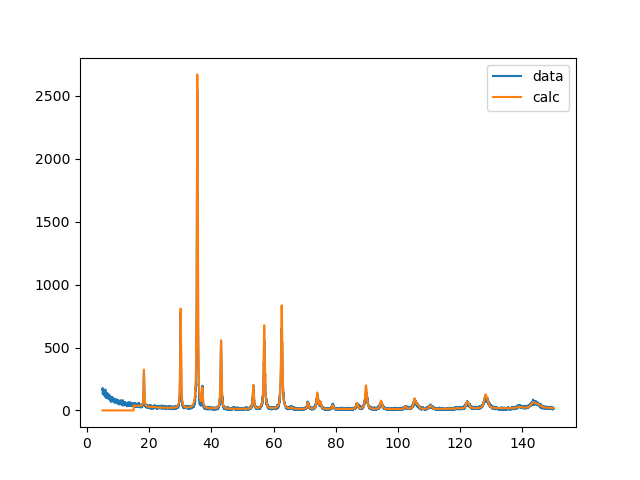

In [67]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"),hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"),hist.getdata("ycalc"), label="calc")
ax.legend()

## Let's automate the whole refinement protocol

In [74]:
PROJECT_NAME = 'gsas_background.gpx'
gpx = G2.G2Project(newgpx=PROJECT_NAME)
gpx.save()
hist = gpx.add_powder_histogram(datafile='magnetit.prn', iparams='cuka.instprm')
ph_magnetite = gpx.add_phase(
    phasename='magnetite',
    phasefile="Fe3O4_3.cif",
    histograms=[hist],
)

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx
/home/edgar1993a/work/pyobjcryst/magnetit.prn
Skipping header line     5.000       166

Skipping header line     5.020       176

Skipping header line     5.040       166

GSAS powder data scan error: no BANK records
/home/edgar1993a/work/pyobjcryst/magnetit.prn read by Reader Topas xye or 2th Fit2D chi
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank None
/home/edgar1993a/work/pyobjcryst/Fe3O4_3.cif read by Reader CIF
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx


1:3: Trying to find one of END, data_heading
>     5.000       166
>     ^
1:3: Trying to find one of END, data_heading
>     5.000       166
>     ^


In [75]:
# Step-by-step refinement
hist.calc_autobkg()
ref_list = [
    {"set" : {"Limits" : {"low" : 15}, "Background" : {"no. coeffs" : 6, "refine" : True}}},
    {"set" : {"Background" : {"no. coeffs" : 8, "refine" : True}}},
    {"set" : {"Cell" : True, "LeBail" : True}},
    {"set" : {"Instrument Parameters" : ["U", "V", "W", "X", "Y", "Z"]}},
    {"set" : {"Scale" : True, "Size" : {"refine" : True}}},
]
gpx.do_refinements(ref_list)

Using default value of 6.55 for pybaselines.whittaker.[i]arpls background computation
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx
 Hessian Levenberg-Marquardt SVD refinement on 7 variables:
initial chi^2 3.1101e+05 with 6751 obs.
Cycle 0: 0.12s, Chi**2: 1.5058e+05 for 6751 obs., Lambda: 0,  Delta: 0.516, SVD=0
Cycle 1: 0.12s, Chi**2: 1.5058e+05 for 6751 obs., Lambda: 0,  Delta: 1.14e-09, SVD=0
converged
Maximum shift/esd = 56.797 for all cycles
Read from file:/home/edgar1993a/work/pyobjcryst/gsas_background.bak0.gpx
Save to file  :/home/edgar1993a/work/pyobjcryst/gsas_background.gpx
GPX file save successful
 Refinement results are in file: /home/edgar1993a/work/pyobjcryst/gsas_background.lst
 ***** Refinement successful *****
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_background.gpx
 Hessian Levenberg-Marquardt SVD refinement on 9 variables:
initial chi^2 1.5058e+05 with 6751 obs.
Cycle 0: 0.12s, Chi**2: 1.5051e+05 for 6751 obs., Lambda: 0,  Delt

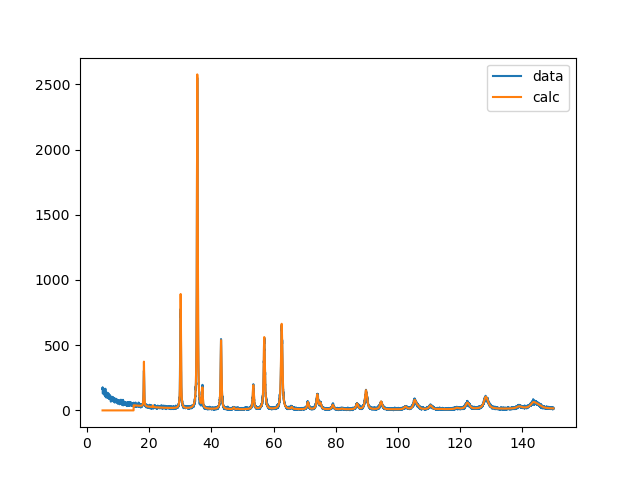

In [76]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"),hist.getdata("yobs"), label="data")
ax.plot(hist.getdata("X"),hist.getdata("ycalc"), label="calc")
ax.legend()

#### Now, the result is even better since we choose the order or refinement (LeBail first, then instrumental parameters, then crystallite size)

#### The background can contain also background peaks (artifacts)

In [71]:
# hist.add_back_peak??